<a href="https://colab.research.google.com/github/vaishak-krishnan/LeNet_MNIST_NITK/blob/main/LeNet_MNIST_200_epochs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


In [4]:
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255


In [5]:
def build_lenet():
    model = models.Sequential()

    # Layer 1: Convolutional + Subsampling
    model.add(layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(28, 28, 1)))
    model.add(layers.AveragePooling2D((2, 2)))

    # Layer 2: Convolutional + Subsampling
    model.add(layers.Conv2D(16, (5, 5), activation='tanh'))
    model.add(layers.AveragePooling2D((2, 2)))

    # Layer 3: Fully Connected
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='tanh'))

    # Layer 4: Fully Connected
    model.add(layers.Dense(84, activation='tanh'))

    # Layer 5: Output Layer
    model.add(layers.Dense(10, activation='softmax'))

    return model

model = build_lenet()


In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
history = model.fit(train_images, train_labels, epochs=200,
                    validation_data=(test_images, test_labels))


Epoch 1/200
1875/1875 [==============================] - 14s 5ms/step - loss: 0.2450 - accuracy: 0.9269 - val_loss: 0.1141 - val_accuracy: 0.9656
Epoch 2/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0899 - accuracy: 0.9720 - val_loss: 0.0788 - val_accuracy: 0.9739
Epoch 3/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0599 - accuracy: 0.9817 - val_loss: 0.0673 - val_accuracy: 0.9779
Epoch 4/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0468 - accuracy: 0.9851 - val_loss: 0.0484 - val_accuracy: 0.9841
Epoch 5/200
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0540 - val_accuracy: 0.9838
Epoch 6/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0311 - accuracy: 0.9898 - val_loss: 0.0510 - val_accuracy: 0.9838
Epoch 7/200
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0267 - accuracy: 0.9913 - val_loss: 0.0440 - val_a

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 [==============================] - 1s 3ms/step - loss: 0.0829 - accuracy: 0.9874
Test Accuracy: 0.9874


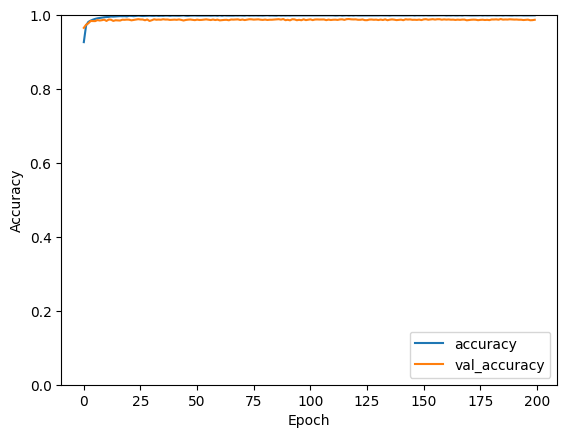

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [10]:
predictions = model.predict(test_images)


313/313 [==============================] - 1s 2ms/step


In [11]:
import numpy as np

predicted_labels = np.argmax(predictions, axis=1)


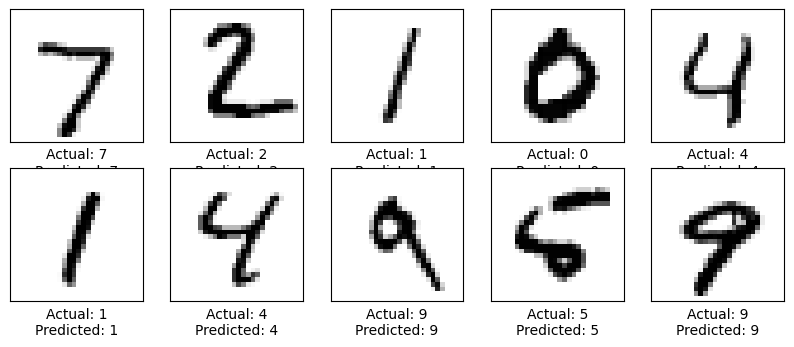

In [12]:
def display_predictions(images, actual_labels, predicted_labels, num_images=10):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(f"Actual: {actual_labels[i]}\nPredicted: {predicted_labels[i]}")
    plt.show()

display_predictions(test_images, test_labels, predicted_labels)
